## Tiling a domain 1: Hexagonal lattice

Partitioning a larger sample of interest into smaller regions using tiling is common in spatial data analysis. This can be used to simply generate subregions of the space or to aggregate proximal objects for spatial statistics. In MuSpAn, we call these partitions 'regions' as there are many ways of tiling a domain. Among these approaches, hexagonal lattices are particularly favored due to their compactness and uniform proximity, providing an efficient way to represent spatial relationships. 

In this tutorial we will walk through the simple process of generating hexagonal tiles in a domain. Let's begin with our usual imports and loading an example dataset.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Architecture
Number of objects: 5991
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

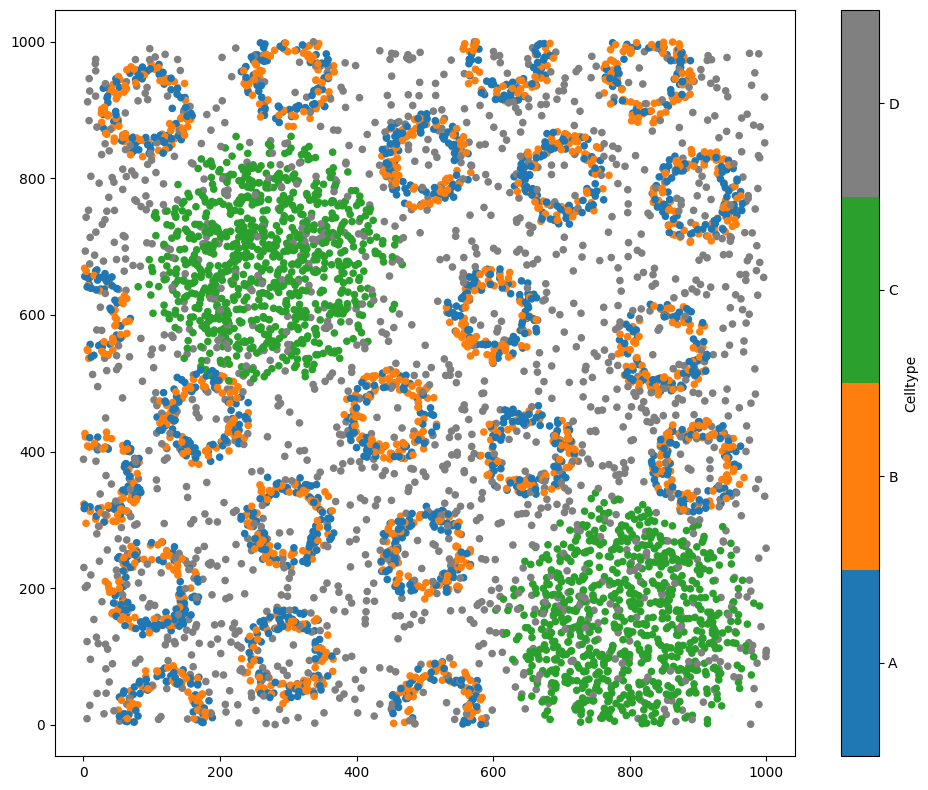

In [1]:
# Import necessary libraries
import muspan as ms
import matplotlib.pyplot as plt

# Load an example domain from the muspan dataset
example_domain = ms.datasets.load_example_domain('Synthetic-Points-Architecture')

# Visualise the example domain with the 'Celltype' label
ms.visualise.visualise(example_domain, 'Celltype')

To start, we might want to just tile the whole domain. We can do this with the `generate_hexgrid` which is in the `region_based` submodule. The function will generate a tiling of the domain using hexagons where each hexagon is a shape-like object in MuSpAn. This means any hexagon will be like any other MuSpAn object, able to have labels and be queried! 

In it's basic usage, the main parameters of this function are:
1. `side_length`: the length of the edge of the hexagons;
2. `regions_collection_name`: The collections the hexagon shape objects will be added to;
3. `region_label_name`: The name of the label that will be used to assign objects to the corresponding region tile.

Let's use this to tile our domain using a hexagonal lattice with hexagons of side length 100.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

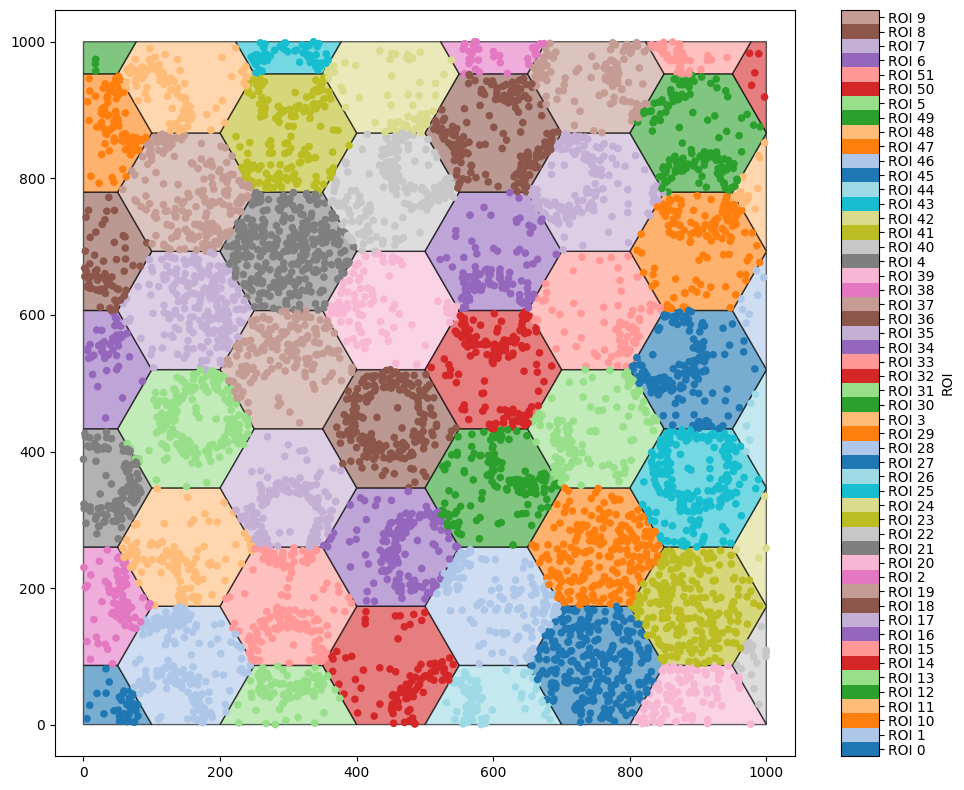

In [2]:
# Generate a hexagonal grid within the example domain
# The grid will have a side length of 100 units
ms.region_based.generate_hexgrid(example_domain, side_length=100, regions_collection_name='Hexgrid', region_label_name='ROI')

# Visualise the generated hexagonal grid within the example domain
ms.visualise.visualise(example_domain, 'ROI')

We can see these hexagons have been added to a collection called 'Hexgrid' which we specified in the function. In addtion, labels called 'ROI' (as specified in the function) have been added to all objects to represent the region assignment. We can see this in the above plot but also in the below print out.

In [3]:
# Print the example domain object to inspect additional labels and collections
print(example_domain)

Domain name: Architecture
Number of objects: 6044
Collections: ['Cell centres', 'Hexgrid']
Labels: ['Celltype', 'ROI', 'region counts: A', 'region counts: B', 'region counts: C', 'region counts: D'] 
Networks: [] 
Distance matrices: []


Notice we have some extra labels here called 'region counts: ...'. This is another automatic feature of `generate_hexgrid` which automatically generates observed counts of all labels in a domain as add these as labels to the hexagonal object. In our example, we can see that 'region counts: A' counts the number of objects with label 'A' in each region. This is visualised below.

(<Figure size 1000x800 with 3 Axes>, <Axes: >)

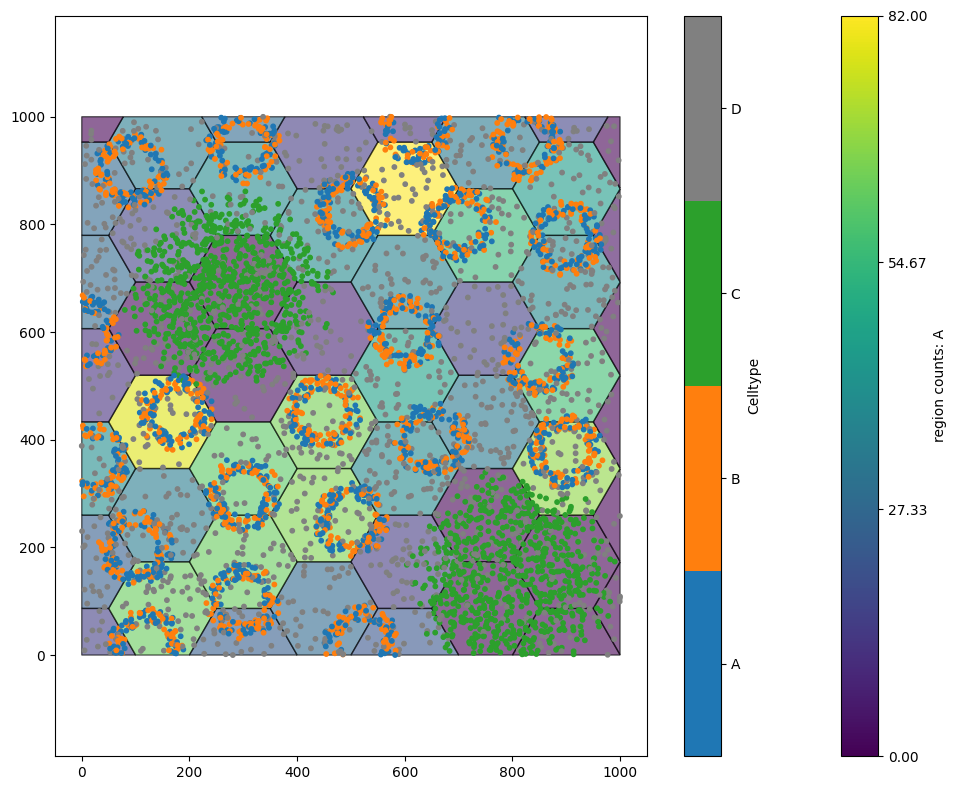

In [4]:
# Visualise the hexagonal grid within the example domain, focusing on the region counts for label 'A'
ms.visualise.visualise(example_domain, 'region counts: A', objects_to_plot=('collection', 'Hexgrid'))

# Visualise the 'Celltype' label within the example domain, overlaying the cell centres
ms.visualise.visualise(example_domain, 'Celltype', objects_to_plot=('collection', 'Cell centres'), ax=plt.gca(), marker_size=10)

### Hexgrids in boundaries (clipping to boundary)

We may also want to tile our spatial data but only within a prescribed boundary. For instance, this could be an annotation marking a region of interest. In this case can use the `include_boundary` and `exclude_boundary` parameters. Let's make a shape to demonstrate this.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

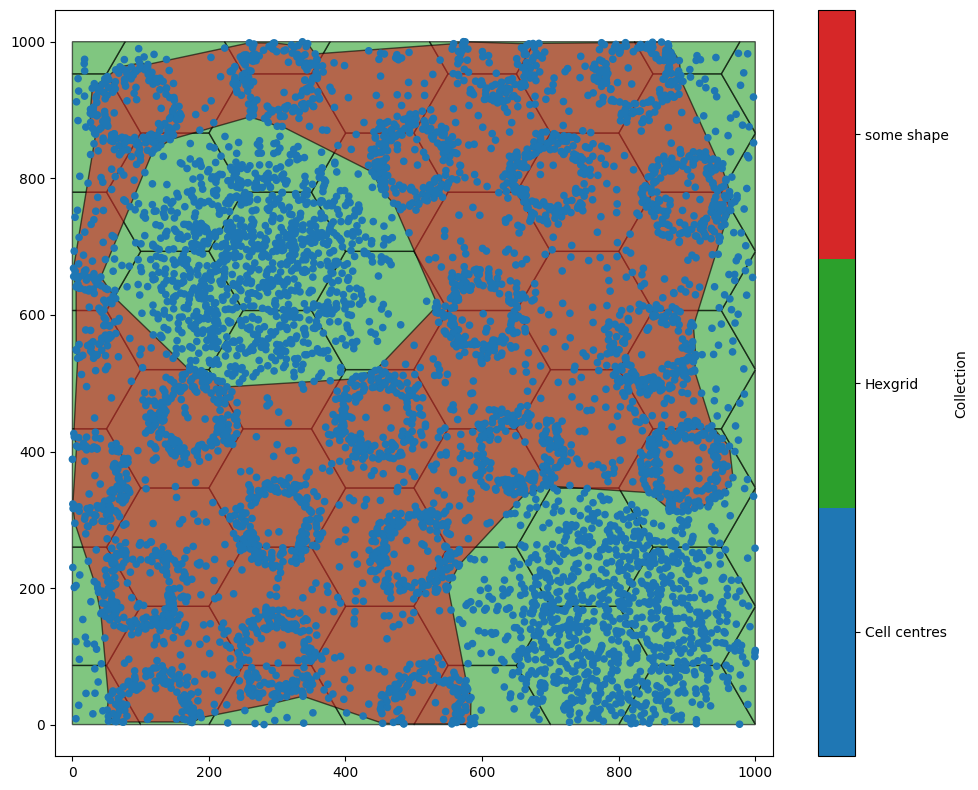

In [5]:
# Query the example domain for cells labeled 'A' or 'B'
query_AB = ms.query.query(example_domain, ('label', 'Celltype'), 'in', ['A', 'B'])

# Convert the queried objects into a shape using the alpha shape method
example_domain.convert_objects(
    population=query_AB,
    collection_name='some shape',
    object_type='shape',
    conversion_method='alpha shape',
    conversion_method_kwargs=dict(alpha=120)
)

# Visualise the example domain with the newly created shapes
ms.visualise.visualise(example_domain)

Now we have a shape, we can use this as a boundary to tile inside or outside. 

An important factor to consider here is whether we want to cut the hexagons to fit within this boundary or whether we can to simply cover the boundary in with hexagons, preserving their area (allowing overlap). To control this we need to use the `region_include_method` parameter. For now, let's assume we'd like to clip our hexagons to fit in the boundary. We can do this by setting `region_include_method='clip'`.

In [6]:
# Generate a hexagonal grid within the example domain, including boundaries defined by 'some shape'
# The grid will have a side length of 100 units
ms.region_based.generate_hexgrid(
    example_domain,
    side_length=100,
    include_boundaries=('collection', 'some shape'),
    regions_collection_name='Hexgrid in boundary',
    region_label_name='ROI in boundary',
    region_include_method='clip'
)

Let's make sure we have generated hexgonal objects in this boundary.

(<Figure size 1000x800 with 1 Axes>, <Axes: >)

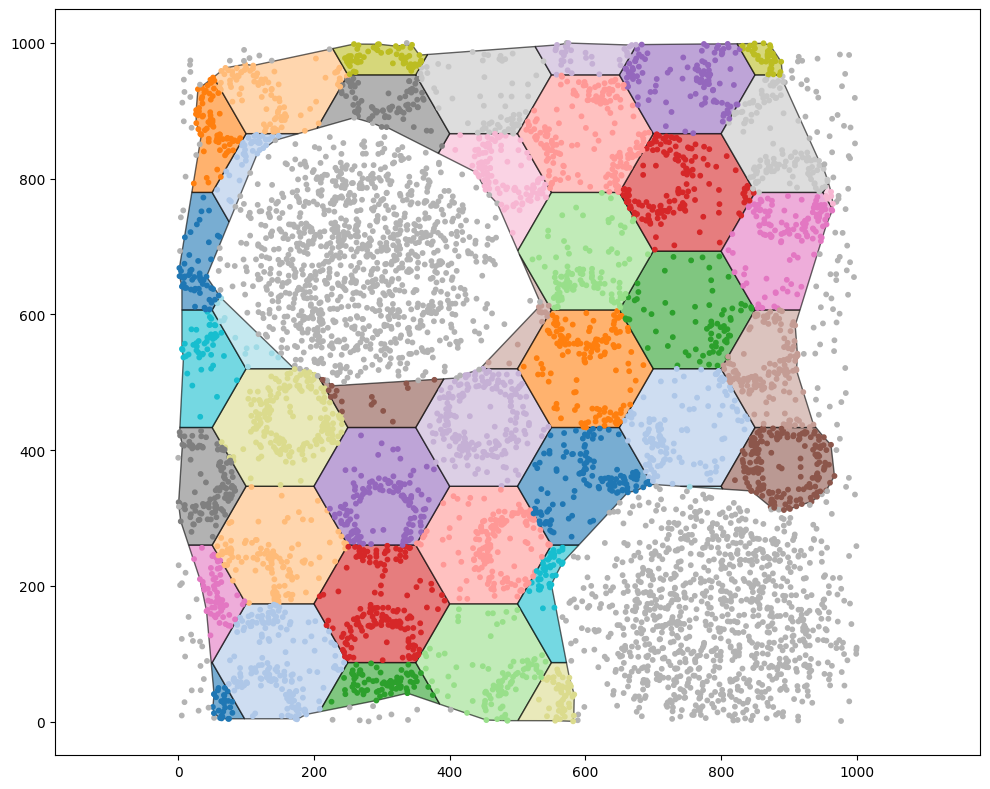

In [7]:
# Visualise the hexagonal grid within the example domain, focusing on the 'ROI in boundary' label
ms.visualise.visualise(
    example_domain,
    'ROI in boundary',
    objects_to_plot=('collection', 'Hexgrid in boundary'),
    add_cbar=False
)

# Overlay the cell centres on the visualisation of the 'ROI in boundary' label
ms.visualise.visualise(
    example_domain,
    'ROI in boundary',
    objects_to_plot=('collection', 'Cell centres'),
    ax=plt.gca(),
    add_cbar=False,
    marker_size=10
)

### Hexgrids in boundaries (cover the boundary)

Alternatively, if we'd like make sure all hexagons have equal area, we can use the `region_include_method='partial'` argument. We can see this below.

In [8]:
# Generate a hexagonal grid within the example domain, including boundaries defined by 'some shape'
# The grid will have a side length of 100 units
ms.region_based.generate_hexgrid(
    example_domain,
    side_length=100,
    include_boundaries=('collection', 'some shape'),
    regions_collection_name='Hexgrid in boundary - partial',
    region_label_name='ROI in boundary - partial',
    region_include_method='partial'
)

(<Figure size 1000x800 with 1 Axes>, <Axes: >)

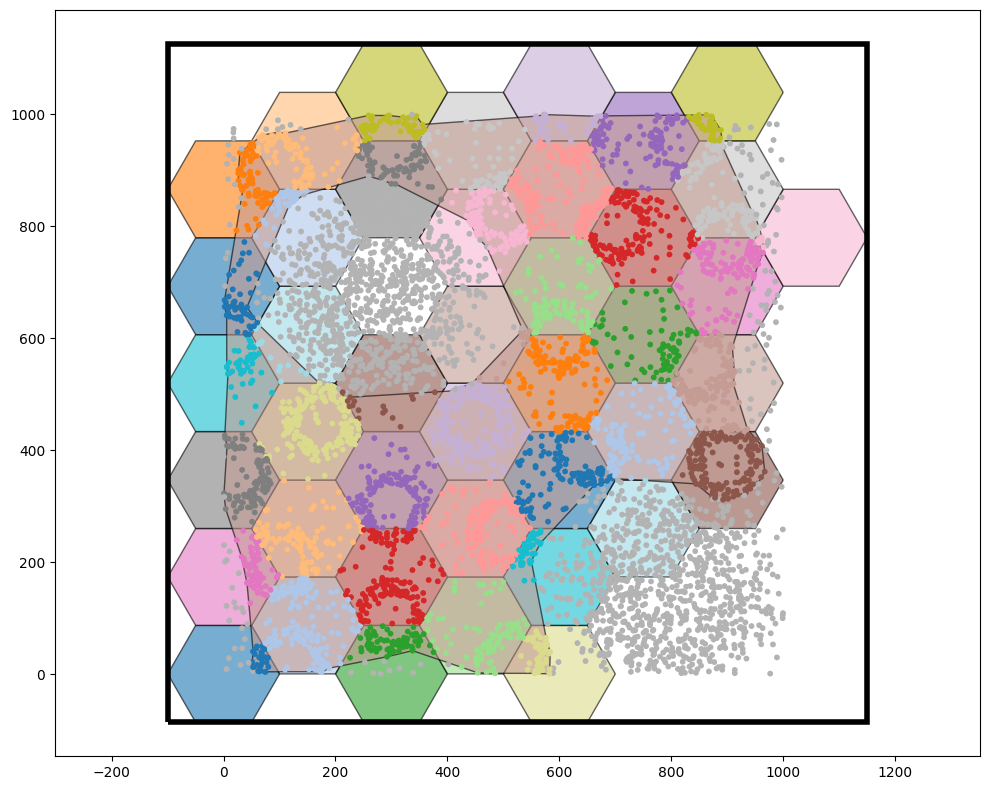

In [9]:
# Visualise the hexagonal grid within the example domain, focusing on the 'ROI in boundary' label
ms.visualise.visualise(
    example_domain,
    'ROI in boundary - partial',
    objects_to_plot=('collection', 'Hexgrid in boundary - partial'),
    add_cbar=False
)

ms.visualise.visualise(
    example_domain,
    'ROI in boundary - partial',
    objects_to_plot=('collection', 'some shape'),
    ax=plt.gca(),
    add_cbar=False,
    marker_size=10
)

# Overlay the cell centres on the visualisation of the 'ROI in boundary' label
ms.visualise.visualise(
    example_domain,
    'ROI in boundary - partial',
    objects_to_plot=('collection', 'Cell centres'),
    ax=plt.gca(),
    add_cbar=False,
    marker_size=10,
    show_boundary=True
)

Notice that hexagons have been generated to completely cover the 'some shape' boundary where all regions have equal area. But we need to be careful as we have now added objects that have extended our boundaries which will impact our spatial statistics!

There are many other things we can do with the `generate_hexgrid` and so check our documentation too see more possibilities for this functionality.